In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

C:\Users\RAINMAKER\AppData\Local\Temp\ipykernel_12092\3307134495.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df = pd.read_csv('C:\\Users\\RAINMAKER\\Downloads\\used_cars.csv')
df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [6]:
df.describe()

,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


# Data Cleaning

In [ ]:
df.columns

In [ ]:
df.isnull().sum()

## lets handle columns with null values first

In [ ]:
df.fuel_type.value_counts()

In [ ]:
sns.countplot(data = df, x = 'fuel_type')

### we will fill the null values with the mose common values which is 'Gasoline' and drop rows with '-' and 'not supported' since they are too little

In [ ]:
# Filling Null values and removing undefiend ones
df.fuel_type.fillna('Gasoline', inplace  = True)

values_to_remove = ['–', 'not supported']

df = df[df['fuel_type'].isin(values_to_remove) == False]

df.fuel_type.value_counts()

In [ ]:
df.accident.value_counts()

In [ ]:
# Dropping null values
df = df.dropna(subset = ['accident'])

# converting values to integers
df['accident'] = df['accident'].apply(lambda x: 1 if x == 'At least 1 accident or damage reported' else 0)

df.accident.value_counts()

In [ ]:
df.isnull().sum()

In [ ]:
df.clean_title.value_counts()

In [ ]:
# Filling null values with 'No'
df.clean_title.fillna('No', inplace = True)

In [ ]:
df.clean_title.value_counts()

In [ ]:
df.brand.value_counts()

In [ ]:
df.model.value_counts()

In [ ]:
df.model_year.value_counts()

In [ ]:
df[df['model_year'] == 2024]

In [ ]:
# dropping cars from any year after 2023

df = df[df['model_year'] <= 2023]

In [ ]:
df.model_year.value_counts()

In [ ]:
df['milage']

In [ ]:
# Removing the 'mi.' from every row in the column
df['milage'] = df['milage'].apply(lambda x: x.split(' ')[0])

# Removing the Comma so i can convert the colomn to float
df['milage'] = df['milage'].apply(lambda x: x.replace(',', ''))

# Converting the column to float
df['milage'] = df['milage'].astype('float')

In [ ]:
df['milage']

In [ ]:
df.engine.value_counts()

In [ ]:
df.transmission.value_counts()

In [ ]:
df.ext_col.value_counts()

In [ ]:
df.int_col.value_counts()

In [ ]:
df.price

In [ ]:
# Removing the Comma and the Dollar sign so i can convert the column to float
df['price'] = df['price'].apply(lambda x: x.replace(',', '').replace('$', ''))

# Converting the column to float
df['price'] = df['price'].astype('float')

In [ ]:
df.price

# EDA

<Axes: xlabel='accident', ylabel='price'>

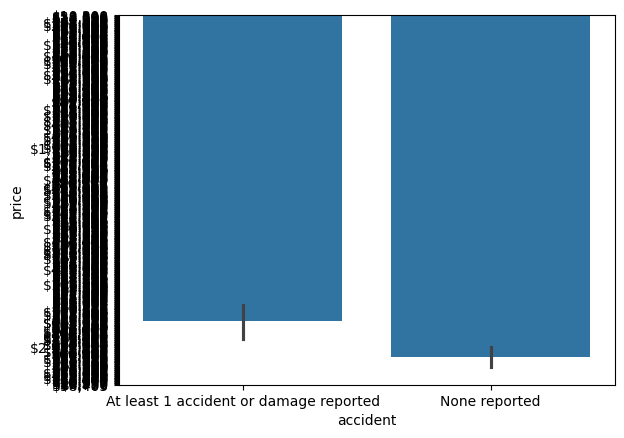

In [7]:
sns.barplot(data = df, x = 'accident', y = 'price')

<Axes: xlabel='clean_title', ylabel='price'>

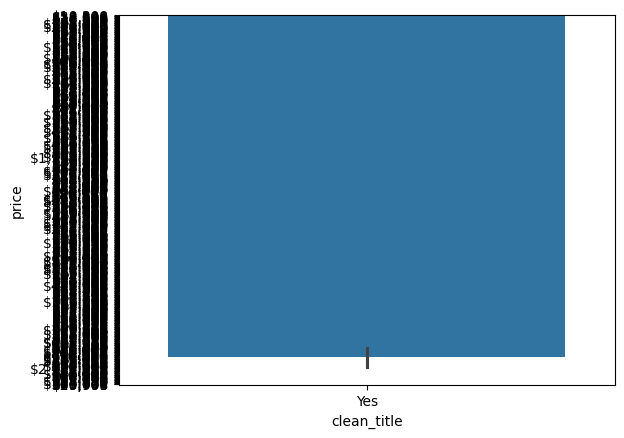

In [8]:
sns.barplot(data = df, x = 'clean_title', y = 'price')

<BarContainer object of 4009 artists>

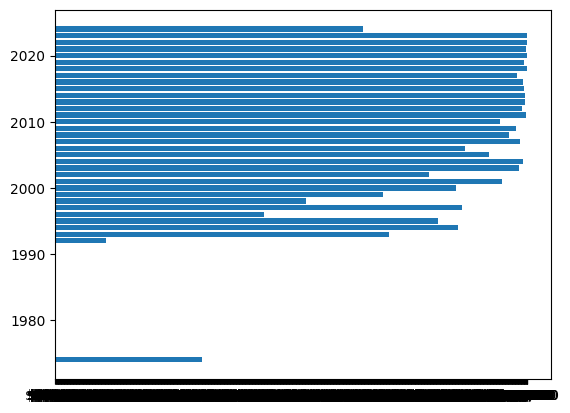

In [9]:
plt.barh(df['model_year'], df['price'])

## Removing Outliers

<Axes: xlabel='price'>

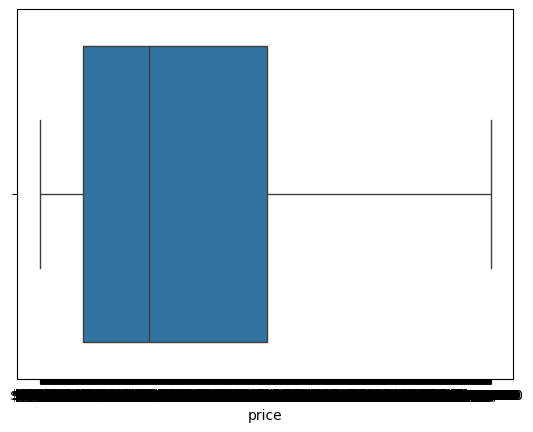

In [10]:
sns.boxplot(data = df, x = 'price')

In [11]:
# get the 25th and 75th percentiles
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
# get the interquartile range
IQR = Q3 - Q1
# get the upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
IQR

In [ ]:
print(upper_bound, lower_bound)

In [ ]:
df[(df['price'] > upper_bound) | (df['price'] < lower_bound)].shape[0]

In [ ]:
# remove the outliers
df = df[(df['price'] < upper_bound) & (df['price'] > lower_bound)]

## Removing Outliers again

In [ ]:
sns.boxplot(data=df, x='price')

In [ ]:
# get the 25th and 75th percentiles
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
# get the interquartile range
IQR = Q3 - Q1
# get the upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

In [ ]:
IQR

In [ ]:
print(upper_bound, lower_bound)

In [ ]:
df[(df['price'] > upper_bound) | (df['price'] < lower_bound)].shape[0]

In [ ]:
df = df[(df['price'] < upper_bound) & (df['price'] > lower_bound)]

In [ ]:
sns.boxplot(data=df, x='price')

# Model Building

In [1]:
df_dummy = pd.get_dummies(df)

NameError: name 'pd' is not defined

In [ ]:
len(df_dummy.columns)

In [ ]:
X = df_dummy.drop('price', axis = 1)
y = df_dummy['price']

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 142)

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_error = mean_absolute_error(y_test, rf_pred)
rf_error

In [ ]:
hb = HuberRegressor()
hb.fit(X_train, y_train)
hb_pred = hb.predict(X_test)
hb_error = mean_absolute_error(y_test, hb_pred)
hb_error

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_error = mean_absolute_error(y_test, lr_pred)
lr_error

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_error = mean_absolute_error(y_test, dt_pred)
dt_error

## Comparing models

In [ ]:
Errors = {'RandomForestRegressor': rf_error, 'HuberRegressor': hb_error, 'LinearRegressor': lr_error, 'DecisionTreeRegressor': dt_error}

In [ ]:
names = list(Errors.keys())
values = list(Errors.values())

In [ ]:
plt.barh(range(len(Errors)), values, tick_label=names)

In [ ]:
Accuracy = pd.DataFrame(list(Errors.items()), columns = ['Model_Name' ,'Mean_Error'])

## The LinearRegressor is the best of them

In [ ]:
Accuracy.sort_values(by = 'Mean_Error')